In [1]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24)

In [2]:
def read_tejaas(filename):
    rsidlist = list()
    pvallist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            pval = float(linesplit[5])
            rsidlist.append(rsid)
            pvallist.append(pval)
    return rsidlist, pvallist

In [3]:
pvals = list()

for sim in range(20):
    simdir = "sim{:03d}".format(sim)
    paramdir = "15158_450_20_800_30_50_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_5_0.02"
    srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
    randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/rr.txt')
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/rr.txt')
    
    rr_rsids, rr_pvals = read_tejaas(rrfile)
    pvals += rr_pvals
    
pvals = np.array(pvals)
select, pcorr = multitest.fdrcorrection(pvals, alpha = 0.005)

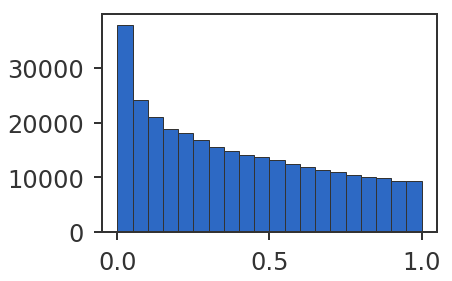

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist(pvals)
plt.show()